In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random

from dataset import RadarCameraYoloDataset

In [3]:
dataset = RadarCameraYoloDataset(data_root="../../WaterScenes/sample_dataset/")

In [4]:
random_idx = random.randint(0, len(dataset))
print(random_idx)
image, radar, labels = dataset[random_idx]

print(image.shape) # B, C, H, W
print(radar.shape)

image = np.transpose(image, (1, 2, 0))
H, W, _ = image.shape

num_channels = radar.shape[0]
print(f"Radar REVP has {num_channels} channels.")

58
torch.Size([3, 320, 320])
torch.Size([4, 160, 160])
Radar REVP has 4 channels.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


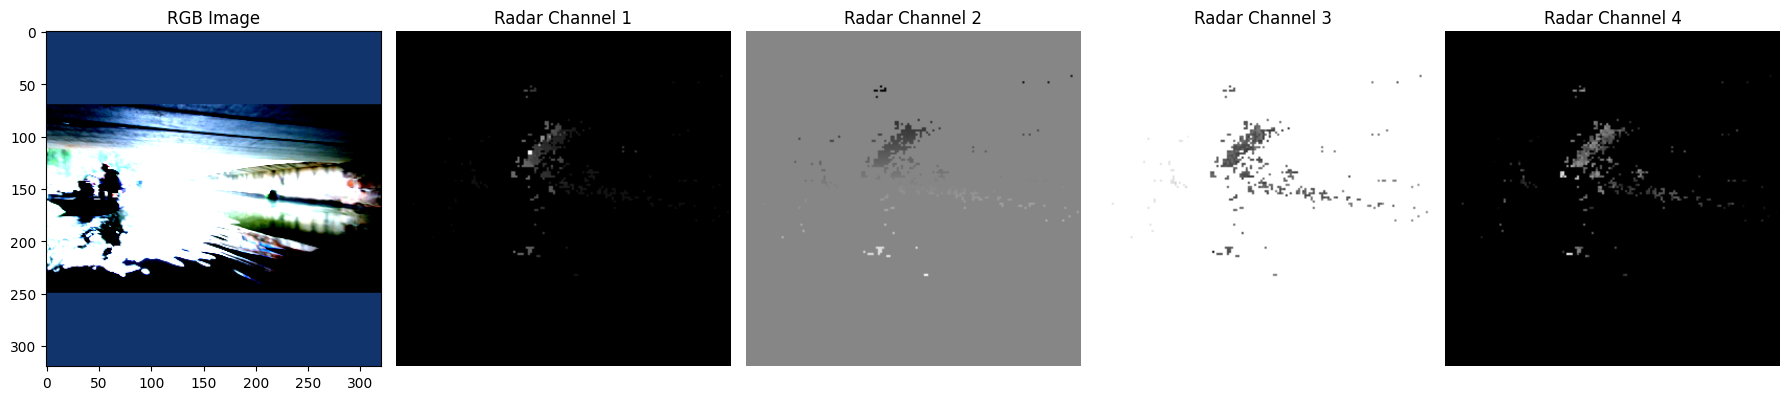

In [5]:
plt.figure(figsize=(18, 6))

# 1️⃣ 원본 RGB 이미지
plt.subplot(1, 5, 1)  
plt.imshow(image)  # (C, H, W) → (H, W, C)
plt.title("RGB Image")

# 2️⃣ 레이더 데이터 4채널 출력
for i in range(num_channels):
    plt.subplot(1, 5, i + 2)
    plt.imshow(radar[i].numpy(), cmap="gray")  # i번째 채널 출력
    plt.title(f"Radar Channel {i+1}")
    plt.axis("off")

plt.tight_layout()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


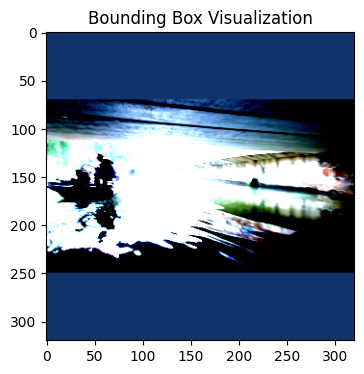

In [6]:
# 3️⃣ 라벨 데이터 출력
for lbl in labels:
    print(f"Class: {lbl[0].item()}, x_center: {lbl[1].item()}, y_center: {lbl[2].item()}, width: {lbl[3].item()}, height: {lbl[4].item()}")

fig, ax = plt.subplots(1, figsize=(8, 4))
ax.imshow(image)

# 바운딩 박스 그리기
for lbl in labels:
    class_id, x_center, y_center, width, height = lbl.numpy()
    
    # YOLO 형식 (정규화된 좌표) → 실제 좌표 변환
    x_min = (x_center - width / 2) * W
    y_min = (y_center - height / 2) * H
    box_w = width * W
    box_h = height * H

    # 바운딩 박스 추가
    rect = patches.Rectangle(
        (x_min, y_min), box_w, box_h, linewidth=2, edgecolor="red", facecolor="none"
    )
    ax.add_patch(rect)
    ax.text(x_min, y_min - 5, f"Class {int(class_id)}", color="red", fontsize=12, weight="bold")

plt.title("Bounding Box Visualization")
plt.show()